In [2]:
from pyspark import SparkContext, SparkConf

In [3]:
conf = SparkConf().setAppName('project')
sc = SparkContext(conf=conf)
sc

<SparkContext master=local[*] appName=project>

In [4]:
sc.version

'3.0.2'

In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('project').config('spark.some.config.option', "some-value").getOrCreate()

In [6]:
df1 = spark.read.csv('human_activity_raw_sensor_data/sensor_sample_float.csv', header=True)
df2 = spark.read.csv('human_activity_raw_sensor_data/sensor_sample_int.csv', header=True)
df3 = spark.read.csv('human_activity_raw_sensor_data/sensor.csv', header=True)

In [22]:
df1.show()

+--------+---------+--------------------+---------+
|value_id|sensor_id|           timestamp|    value|
+--------+---------+--------------------+---------+
|  315318|     6222|2020-02-26 11:22:...|17.780000|
|  315319|     6223|2020-02-26 11:22:...|26.510000|
|  315320|     6223|2020-02-26 19:36:...|27.270000|
|  315321|     6222|2020-02-26 19:36:...|51.520000|
|  315322|     6223|2020-02-26 19:36:...|27.260000|
|  315323|     6222|2020-02-26 19:36:...|51.480000|
|  315324|     6223|2020-02-26 19:36:...|27.260000|
|  315325|     6222|2020-02-26 19:36:...|51.440000|
|  315326|     6223|2020-02-26 19:36:...|27.270000|
|  315327|     6222|2020-02-26 19:36:...|51.410000|
|  315328|     6223|2020-02-26 19:36:...|27.260000|
|  315329|     6222|2020-02-26 19:36:...|51.350000|
|  315330|     6223|2020-02-26 19:36:...|27.270000|
|  315331|     6222|2020-02-26 19:36:...|51.300000|
|  315332|     6223|2020-02-26 19:36:...|27.260000|
|  315333|     6222|2020-02-26 19:36:...|51.260000|
|  315334|  

In [7]:
df.count()

60479848

In [14]:
df2.count()

186824862

In [7]:
df1_groupedby = df1.groupBy('sensor_id').count()

In [8]:
df1_groupedby.show()

+---------+-------+
|sensor_id|  count|
+---------+-------+
|     6632|8155416|
|     6896|5788133|
|     7139|6652993|
|     6635|8298548|
|     6223|4155793|
|     6222|3013034|
|     6633|8388726|
|     6634|8116151|
|     6636|7911053|
+---------+-------+



In [9]:
import seaborn as sn
df1_groupedby = df1_groupedby.toPandas()

In [36]:
df3.show()

+---------+-------+-----+--------------------+
|sensor_id|node_id| type|                name|
+---------+-------+-----+--------------------+
|     5894| 541150|  INT|corridor/ambience...|
|     5895| 541151|  INT|bathroom/ambience...|
|     7125| 542381|  INT|bathroom/ambience...|
|     5896| 541152|  INT|bedroom/bed/pressure|
|     6127| 541383|  INT| livingroom/tv/light|
|     6220| 541444|  INT| balcon/door/contact|
|     6253| 541509|  INT|kitchen/fridge/co...|
|     6632| 541888|FLOAT|kitchen/coffeemak...|
|     6633| 541889|FLOAT|kitchen/sandwichm...|
|     6634| 541890|FLOAT|kitchen/dishwashe...|
|     6635| 541891|FLOAT|kitchen/kettle/cu...|
|     6636| 541892|FLOAT|bathroom/washingm...|
|     6896| 542152|FLOAT|kitchen/microwave...|
|     6686| 541885|  INT|bedroom/ambience_...|
|     6687| 541883|  INT|bedroom/weightsca...|
|     7139| 542395|FLOAT|corridor/ilifeRob...|
|     6222| 541141|FLOAT|bathroom/ambience...|
|     6223| 541141|FLOAT|bathroom/ambience...|
|     5887| 5

In [10]:
sensorid_name_rdd = df3.select('sensor_id', 'name').rdd
sensoridkey_namevalue = sensorid_name_rdd.map(lambda x: (x[0], x[1]))
dict_ = sensoridkey_namevalue.collectAsMap()

In [13]:
df1_groupedby['sensor_id_conv'] = df1_groupedby['sensor_id'].apply(lambda x: dict_[x])

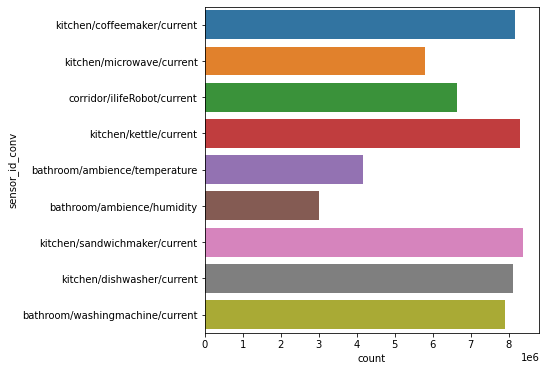

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))
ax = sn.barplot(y='sensor_id_conv', x='count', data=df1_groupedby)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right")